# BI dashboard tool, Athena querying

### Setup van athena connectie

In [1]:
from pyathena import connect
import pandas as pd
import boto3
import matplotlib.pyplot as plt

# Configuratie van AWS session (maakt gebruik van de default profiel in ~/.aws/credentials)
session = boto3.Session()

# Verbinding maken met Athena
conn = connect(
    s3_staging_dir='s3://dataengineering-bers-2324/unsaved/',
    region_name='us-east-1',
    boto3_session=session
)


### Querying via Athena AWS

In [2]:
# Query uitvoeren op klant
queryvb1 = """
SELECT * FROM "datawarehouse-project"."klant" limit 10;
"""

dfvb1 = pd.read_sql(queryvb1, conn)
print(dfvb1)

# Query uitvoeren op weer
queryvb2 = """
SELECT * FROM "datawarehouse-project"."weer" limit 10;
"""

dfvb2 = pd.read_sql(queryvb2, conn)
print(dfvb2)

C:\Users\gouda\AppData\Local\Temp\ipykernel_16580\507492147.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfvb1 = pd.read_sql(queryvb1, conn)


   customer_id vluchtid  operatie  faciliteiten  shops
0            1  1317352       7.0           6.9    6.9
1            2  1317395       6.5           7.3    7.0
2            3  1317406       6.9           6.9    6.3
3            4  1317506       4.7           5.9    7.1
4            5  1317508       6.7           8.5    6.2
5            6  1317514       6.1           3.6    7.2
6            7  1317559       6.0           7.6    6.6
7            8  1317587       6.3           7.2    5.6
8            9  1317629       6.9           4.1    6.2
9           10  1317633       6.4           5.2    4.6


C:\Users\gouda\AppData\Local\Temp\ipykernel_16580\507492147.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfvb2 = pd.read_sql(queryvb2, conn)


        datum       ddvec       fhvec          fg         fhx        fhxh   
0  2014-01-01  24          35          38          60          1           \
1  2014-01-02  212         22          31          50          18           
2  2014-01-03  33          17          25          60          1            
3  2014-01-08  43          35          36          60          20           
4  2014-01-09  32          73          73          80          8            
5  2014-01-10  51          35          35          60          1            
6  2014-01-04  199         30          31          50          14           
7  2014-01-05  194         28          28          40          14           
8  2014-01-06  196         24          25          40          19           
9  2014-01-07  160         16          20          40          12           

          fhn        fhnh         fxx        fxxh  ...        vvnh   
0  0           23          110         1           ...  23          \
1  10       

### Data visualisatie: Query uitvoeren op vlucht op basis van luchthavens

C:\Users\gouda\AppData\Local\Temp\ipykernel_16580\2788205464.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_luchthavens_vis = pd.read_sql(query1, conn)


          country  flight_count
0           Spain         52260
1         Germany         48588
2  United Kingdom         33488
3   United States         30836
4        Portugal         28136
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       58 non-null     object
 1   flight_count  58 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None


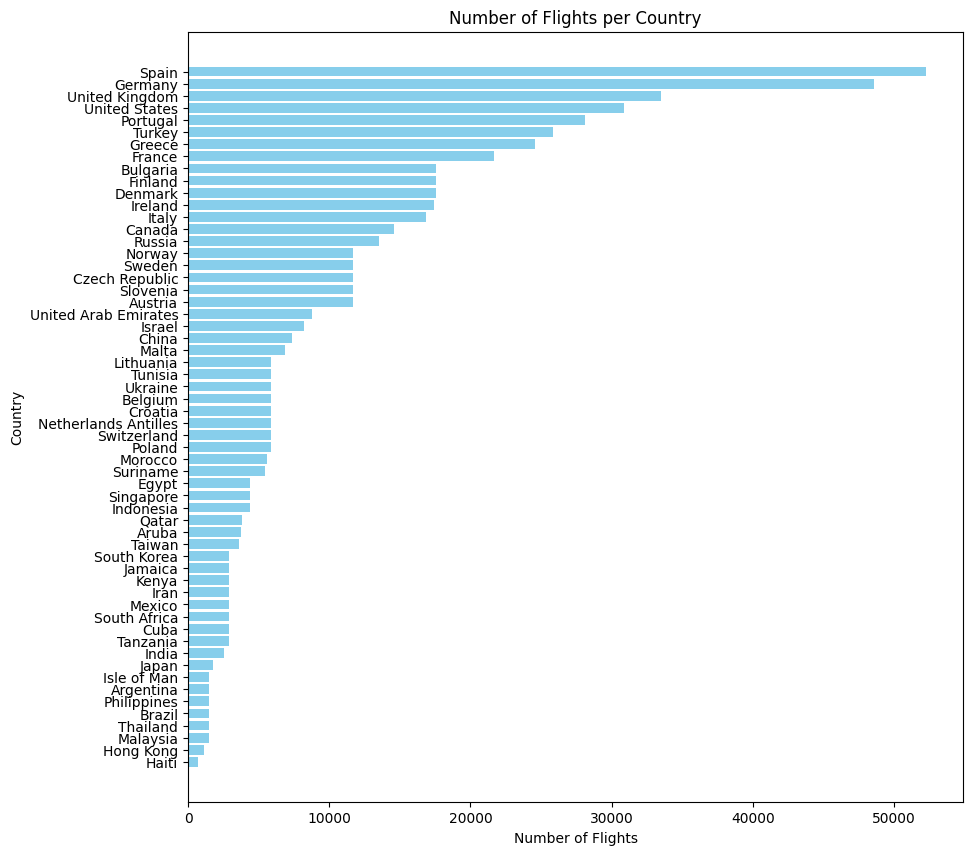

In [3]:
# Query uitvoeren op vlucht op basis van luchthavens
query1 = """
SELECT luchthaven.country, COUNT(vlucht.dest_luchthaven_id) AS flight_count
FROM "datawarehouse-project"."vlucht"
JOIN "datawarehouse-project"."luchthaven"
ON vlucht.dest_luchthaven_id = luchthaven.iata
GROUP BY luchthaven.country
ORDER BY flight_count DESC
"""

# Uitvoeren van de query en het resultaat in een DataFrame opslaan
df_luchthavens_vis = pd.read_sql(query1, conn)

# Weergeven van de eerste paar rijen van de DataFrame
print(df_luchthavens_vis.head())

# Controleer de DataFrame op lege waarden en datatypes
print(df_luchthavens_vis.info())

# Stap 4: Visualisatie
# 1. Staafdiagram maken van het aantal vluchten per land
plt.figure(figsize=(10, 10))
plt.barh(df_luchthavens_vis['country'], df_luchthavens_vis['flight_count'], color='skyblue')
plt.xlabel('Number of Flights')
plt.ylabel('Country')
plt.title('Number of Flights per Country')
plt.gca().invert_yaxis()
plt.show()


### Query visualisatie: Gemiddelde bezettingsgraad van vluchten per luchtvaartmaatschappij

C:\Users\gouda\AppData\Local\Temp\ipykernel_16580\2870553893.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_maatschappij_bezetting = pd.read_sql(query2, conn)


                   name  avg_occupancy
0               Widerøe      50.000000
1            Air Europa      46.003411
2        Cathay Pacific      44.240803
3           Jet Airways      43.505533
4  Thomas Cook Airlines      43.353517
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           60 non-null     object 
 1   avg_occupancy  60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB
None


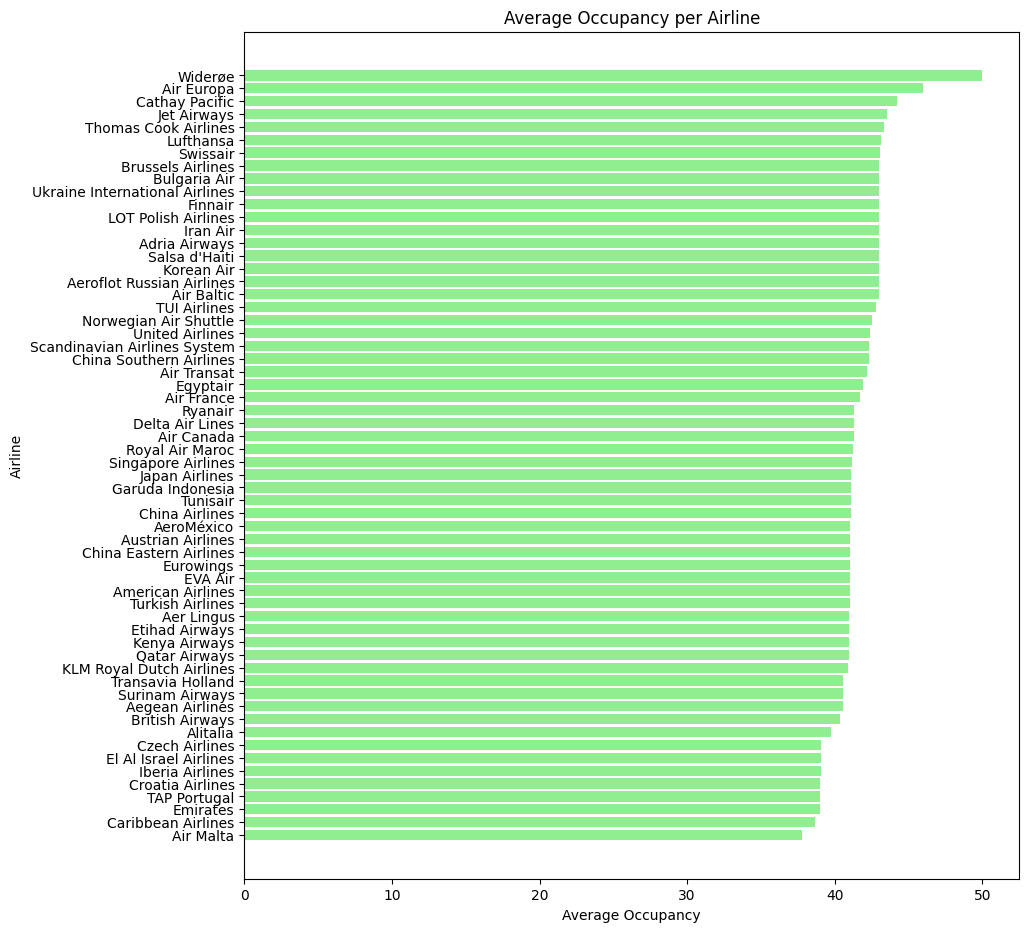

In [4]:
# 2. Gemiddelde bezettingsgraad van vluchten per luchtvaartmaatschappij
query2 = """
SELECT maatschappij.name, AVG(vlucht.bezetting) AS avg_occupancy
FROM "datawarehouse-project"."vlucht"
JOIN "datawarehouse-project"."maatschappij" 
ON vlucht.maatschappij_id = maatschappij.iata
GROUP BY maatschappij.name
ORDER BY avg_occupancy DESC
"""

# Uitvoeren van de query en het resultaat in een DataFrame opslaan
df_maatschappij_bezetting = pd.read_sql(query2, conn)

# Weergeven van de eerste paar rijen van de DataFrame
print(df_maatschappij_bezetting.head())

# Controleer de DataFrame op lege waarden en datatypes
print(df_maatschappij_bezetting.info())

# Staafdiagram maken van de gemiddelde bezettingsgraad van vluchten per luchtvaartmaatschappij
plt.figure(figsize=(10, 11))
plt.barh(df_maatschappij_bezetting['name'], df_maatschappij_bezetting['avg_occupancy'], color='lightgreen')
plt.xlabel('Average Occupancy')
plt.ylabel('Airline')
plt.title('Average Occupancy per Airline')
plt.gca().invert_yaxis()
plt.show()



### Query visualisatie: Aantal vluchten per vliegtuigtype

C:\Users\gouda\AppData\Local\Temp\ipykernel_16580\3215585243.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vliegtuigtype = pd.read_sql(query3, conn)


  merk_vliegtuigtype  flight_count
0       Boeing - 738        152058
1       Airbus - 320         78502
2       Boeing - 73G         57120
3       Boeing - 772         56627
4       Airbus - 332         42846
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   merk_vliegtuigtype  21 non-null     object
 1   flight_count        21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


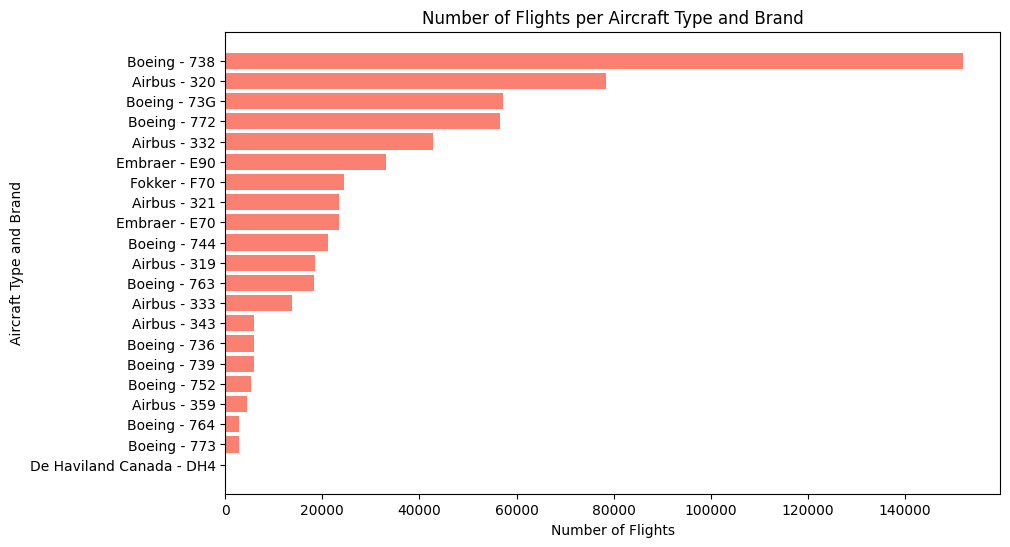

In [5]:
# 3. Aantal vluchten per vliegtuigtype met TRIM toegepast op vliegtuigcode, en merk kolom toegevoegd
query3 = """
SELECT CONCAT(TRIM(vliegtuig.merk), ' - ', TRIM(vliegtuig.vliegtuigtype)) AS merk_vliegtuigtype, 
       COUNT(vlucht.vluchtid) AS flight_count
FROM "datawarehouse-project"."vlucht"
JOIN "datawarehouse-project"."vliegtuig" 
ON TRIM(vlucht.vliegtuigcode) = TRIM(vliegtuig.vliegtuigcode)
GROUP BY CONCAT(TRIM(vliegtuig.merk), ' - ', TRIM(vliegtuig.vliegtuigtype))
ORDER BY flight_count DESC
"""

# Uitvoeren van de query en het resultaat in een DataFrame opslaan
df_vliegtuigtype = pd.read_sql(query3, conn)

# Weergeven van de eerste paar rijen van de DataFrame
print(df_vliegtuigtype.head())

# Controleer de DataFrame op lege waarden en datatypes
print(df_vliegtuigtype.info())

# Controleer of de DataFrame niet leeg is
if df_vliegtuigtype.empty:
    print("De DataFrame is leeg. Controleer de query en de data.")
else:
    # Staafdiagram maken van het aantal vluchten per vliegtuigtype en merk
    plt.figure(figsize=(10, 6))
    plt.barh(df_vliegtuigtype['merk_vliegtuigtype'], df_vliegtuigtype['flight_count'], color='salmon')
    plt.xlabel('Number of Flights')
    plt.ylabel('Aircraft Type and Brand')
    plt.title('Number of Flights per Aircraft Type and Brand')
    plt.gca().invert_yaxis()
    plt.show()